# Chapter 10 - Simple Linear Regression

## By Joseph Hornbeck

## What does a Simple Linear Regression Model do?
#### A Simple Linear Regression model is used to plot and show the differences between two variables. Showing and plotting a chart makes for a better view, when comparing and predicting outputs based on the information that you have to input, along with being able to estimate the relationship between the two.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = sns.load_dataset('diamonds')

In [3]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)
* Measures the relationship between any linear trend in two variables.

* Values can range from 1 to -1.

* Positive correlations mean that the two variables move in the same direction, while a negative correlation shows that the variables tend to move in opposite directions.

* When r = 0, then there is no correlation, which means the variables have no linear association.


In [4]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<AxesSubplot:>

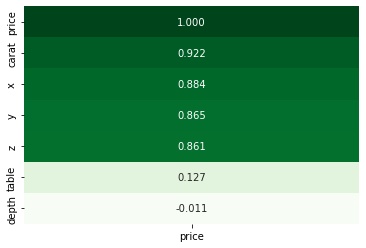

In [5]:
sns.heatmap(data=data.corr()[['price']].sort_values(by='price', ascending=False), 
            annot=True, cmap='Greens', cbar=False,fmt=f'.3f')

## Procedure for Creating and Using a Regression Model
1. First Identify your X and Y variables
2. Split them as a training data set and a testing data set.
3. Fit the training data set into your model with regressor.fit.
4. Run model and check prediction score.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    data[['carat']], data[['price']], 
    test_size=0.30, random_state=20)



In [8]:
# create the model from the training dataset
model = LinearRegression()
model

LinearRegression()

In [9]:
model.fit(x_train, y_train)


LinearRegression()

In [10]:
model.score(x_test, y_test)

0.8504107786474794

In [11]:
y_pred = model.predict(x_test)
y_pred

array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871522],
       [-464.18539337],
       [5507.68827094]])

In [12]:
predict = pd.DataFrame(y_pred, columns=['predicted_price'])
predict.head(3)

,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [16]:
combo = predict.join([x_test.reset_index(drop=True),
                           y_test.reset_index(drop=True)])
combo.head()

,predicted_price,carat,price
0,9540.641914,1.52,8674
1,1940.075433,0.54,1637
2,3180.984246,0.70,2657
3,2327.859437,0.59,1838
4,4421.893059,0.86,2980


In [20]:
melted = pd.melt(combo, id_vars='carat', 
                 value_vars=['price','predicted_price'], 
                 var_name='price_type', value_name='price_value')
melted

,carat,price_type,price_value
0,1.52,price,8674.000000
1,0.54,price,1637.000000
2,0.70,price,2657.000000
3,0.59,price,1838.000000
4,0.86,price,2980.000000
...,...,...,...
32359,0.31,predicted_price,156.269013
32360,1.01,predicted_price,5585.245072
32361,1.53,predicted_price,9618.198715
32362,0.23,predicted_price,-464.185393


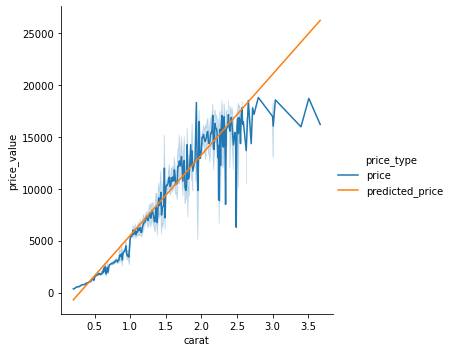

In [30]:
sns.relplot(data=melted, x='carat', y='price_value', 
            hue='price_type',kind='line')

## Regression line equation is y = mx + b, where...
* y is the **dependent** variable
* m is the **slope** of the line
* x is the **independent** variable
* b is the **Y-intercept**

In [31]:
X = data.carat.values.reshape(-1,1)
y = data.price

In [36]:
lr = LinearRegression()
predicted = lr.fit(X,y)

In [40]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')

The slope is [7756.42561797] and the y-intercept is -2256.3605800454293


In [41]:
print(f'The Regression line equation is y=[{m}]x+{b}')

The Regression line equation is y=[[7756.42561797]]x+-2256.3605800454293


In [142]:
perc = m * .7 + b
new= perc[0]
print(f' The predicted price for a .70 carat diamond is ${new:.2f}') 

 The predicted price for a .70 carat diamond is $3173.14


In [145]:
d2= m * 0.54 + b
newd = d2[0]
print(f'The predicted price for a 0.54 carat diamond is ${newd:.2f}')

The predicted price for a 0.54 carat diamond is $1932.11


### The predicted prices from the two previous cells, are close to the predicted prices in the table created from step 18. The values are only a few dollars lower than what the table shows.